<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv',index_col = 'Id')
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [4]:
house.shape

(1460, 80)

In [5]:
house.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
6             50       RL         85.0    14115   Pave   NaN      IR1   
7             20       RL         75.0    10084   Pave   NaN      Reg   
8             60       RL          NaN    10382   Pave   NaN      IR1   
9             50       RM         51.0     6120   Pave   NaN      Reg   
10           190       RL         50.0     7420   Pave   NaN      Reg   
11            20       RL         70.0    11200   Pave   NaN      Reg   
12            60   

In [6]:
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [7]:
#removing houses that isnt residential from the dataset
house = house.drop(house[(house.MSZoning == 'A') | (house.MSZoning == 'C (all)') | 
                         (house.MSZoning == 'I')].index)

In [8]:
house.MSZoning.value_counts()

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [9]:
null_index = house.columns[house.isnull().sum()>0]
house.isnull().sum()[list(null_index)].sort_values(ascending=False)

PoolQC          1443
MiscFeature     1398
Alley           1361
Fence           1172
FireplaceQu      681
LotFrontage      259
GarageYrBlt       79
GarageType        79
GarageFinish      79
GarageQual        79
GarageCond        79
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
# Drop columns PoolQC, MiscFeature, Alley, Fence and FireplaceQu as they have too many nulls. Good idea to be excluded from 
# feature variables

house.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [11]:
house.shape

(1450, 75)

In [12]:

# Fill the null values with NA for no garage and no basement.# Fill th 
na = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 
      'BsmtExposure', 'BsmtCond', 'BsmtCond', 'BsmtQual'
     ]
for a in na:
    house[a].fillna('NA', inplace=True)

In [13]:
# Fill the null values of GarageYrBlt with YearBuilt 
house['GarageYrBlt'].fillna(house['YearBuilt'], inplace=True)

In [14]:
null_index = house.columns[house.isnull().sum()>0]
house.isnull().sum()[list(null_index)].sort_values(ascending=False)

LotFrontage    259
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [15]:
# Fixed characteristic columns

fixed = house[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 
              'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'YearBuilt', 
              'YearRemodAdd', 'MasVnrArea', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 
              '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
              'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
              'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
              'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SalePrice'
             ]].copy()

In [16]:
null_index = fixed.columns[fixed.isnull().sum()>0]

fixed.isnull().sum()[list(null_index)]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [17]:
str_cols = fixed.columns[fixed.dtypes==object]
str_cols

Index([u'MSZoning', u'Street', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'BldgType', u'HouseStyle',
       u'Foundation', u'BsmtExposure', u'GarageType', u'PavedDrive',
       u'SaleType'],
      dtype='object')

In [18]:
#Converting categorical to numerical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in str_cols:
    fixed[i] = le.fit_transform(fixed[i])
print fixed.dtypes


MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
BldgType           int64
HouseStyle         int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
Foundation         int64
BsmtExposure       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
PavedDrive         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64


In [19]:

null_index = fixed.columns[fixed.isnull().sum()>0]

fixed.isnull().sum()[list(null_index)]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [20]:
#Fill the remaining nulls to zero

fixed.fillna(0, inplace=True)

In [21]:
# See the correlation 

corr=fixed.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
GrLivArea        0.708658
GarageCars       0.642135
GarageArea       0.629831
TotalBsmtSF      0.612088
1stFlrSF         0.603300
FullBath         0.556674
TotRmsAbvGrd     0.533355
YearBuilt        0.517602
GarageYrBlt      0.506338
YearRemodAdd     0.501186
MasVnrArea       0.471056
Fireplaces       0.463264
BsmtFinSF1       0.384475
Foundation       0.383525
OpenPorchSF      0.329491
WoodDeckSF       0.320770
2ndFlrSF         0.319774
HalfBath         0.280882
LotArea          0.264715
BsmtFullBath     0.224054
PavedDrive       0.220391
LotFrontage      0.214273
Neighborhood     0.208042
HouseStyle       0.176170
BedroomAbvGr     0.162008
ScreenPorch      0.110540
PoolArea         0.092396
LandSlope        0.058859
MoSold           0.051987
3SsnPorch        0.043807
Street           0.013700
LandContour      0.009866
BsmtFinSF2      -0.014145
Utilities       -0.014655
BsmtHalfBath    -0.017561
MiscVal         -0.021052
YrSold          -0.025391
LotConfig   

In [22]:
fixed.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'BldgType', u'HouseStyle', u'YearBuilt',
       u'YearRemodAdd', u'MasVnrArea', u'Foundation', u'BsmtExposure',
       u'BsmtFinSF1', u'BsmtFinSF2', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'TotRmsAbvGrd', u'Fireplaces',
       u'GarageType', u'GarageYrBlt', u'GarageCars', u'GarageArea',
       u'PavedDrive', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal', u'MoSold',
       u'YrSold', u'SaleType', u'SalePrice'],
      dtype='object')

In [23]:
fixed_corr  = fixed.corr()
fixed_corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
MSSubClass,1.000000,0.038535,-0.215415,-0.139725,-0.050536,0.119960,-0.006603,-0.022946,0.081663,-0.023106,...,-0.002789,-0.011016,-0.044032,-0.030057,0.008308,-0.007172,-0.015808,-0.019356,0.009854,-0.087487
MSZoning,0.038535,1.000000,-0.043387,-0.041238,-0.018118,0.087054,-0.044161,-0.002243,-0.006792,0.007063,...,-0.162067,0.162936,-0.003798,0.017489,-0.005885,0.011437,-0.016044,-0.009386,0.058442,-0.231762
LotFrontage,-0.215415,-0.043387,1.000000,0.100273,-0.004107,0.164458,-0.065394,-0.043552,0.030206,-0.043009,...,0.072127,0.025923,0.023823,0.023599,0.114483,-0.060943,0.017440,-0.013954,-0.037977,0.214273
LotArea,-0.139725,-0.041238,0.100273,1.000000,-0.233858,-0.165542,-0.150298,0.010108,-0.122102,0.442975,...,0.087333,-0.016954,0.020349,0.043435,0.077652,0.037468,0.001500,-0.013579,0.013122,0.264715
Street,-0.050536,-0.018118,-0.004107,-0.233858,1.000000,0.006984,0.077022,0.001382,0.033004,-0.180470,...,-0.021951,0.018625,0.006140,-0.047681,0.003625,-0.013917,0.010967,-0.007441,-0.016324,0.013700
LotShape,0.119960,0.087054,0.164458,-0.165542,0.006984,1.000000,0.090365,-0.036090,0.219075,-0.106261,...,-0.079519,0.077093,-0.036116,-0.053151,-0.019844,-0.042494,-0.034372,0.036123,0.001931,-0.252732
LandContour,-0.006603,-0.044161,-0.065394,-0.150298,0.077022,0.090365,1.000000,0.008186,-0.021926,-0.364041,...,0.037333,-0.059249,-0.022135,0.002222,-0.013534,0.021845,-0.015495,0.026863,-0.029760,0.009866
Utilities,-0.022946,-0.002243,-0.043552,0.010108,0.001382,-0.036090,0.008186,1.000000,-0.032680,-0.005824,...,0.028793,-0.009303,-0.003067,0.102452,-0.001811,-0.002290,-0.051740,0.023531,-0.129920,-0.014655
LotConfig,0.081663,-0.006792,0.030206,-0.122102,0.033004,0.219075,-0.021926,-0.032680,1.000000,-0.011769,...,-0.059429,-0.072260,-0.030494,-0.002195,-0.046904,-0.018945,0.022205,-0.007094,0.016000,-0.065544
LandSlope,-0.023106,0.007063,-0.043009,0.442975,-0.180470,-0.106261,-0.364041,-0.005824,-0.011769,1.000000,...,-0.029650,-0.013803,0.009500,0.055573,-0.015282,-0.003120,0.010748,-0.006636,0.065498,0.058859


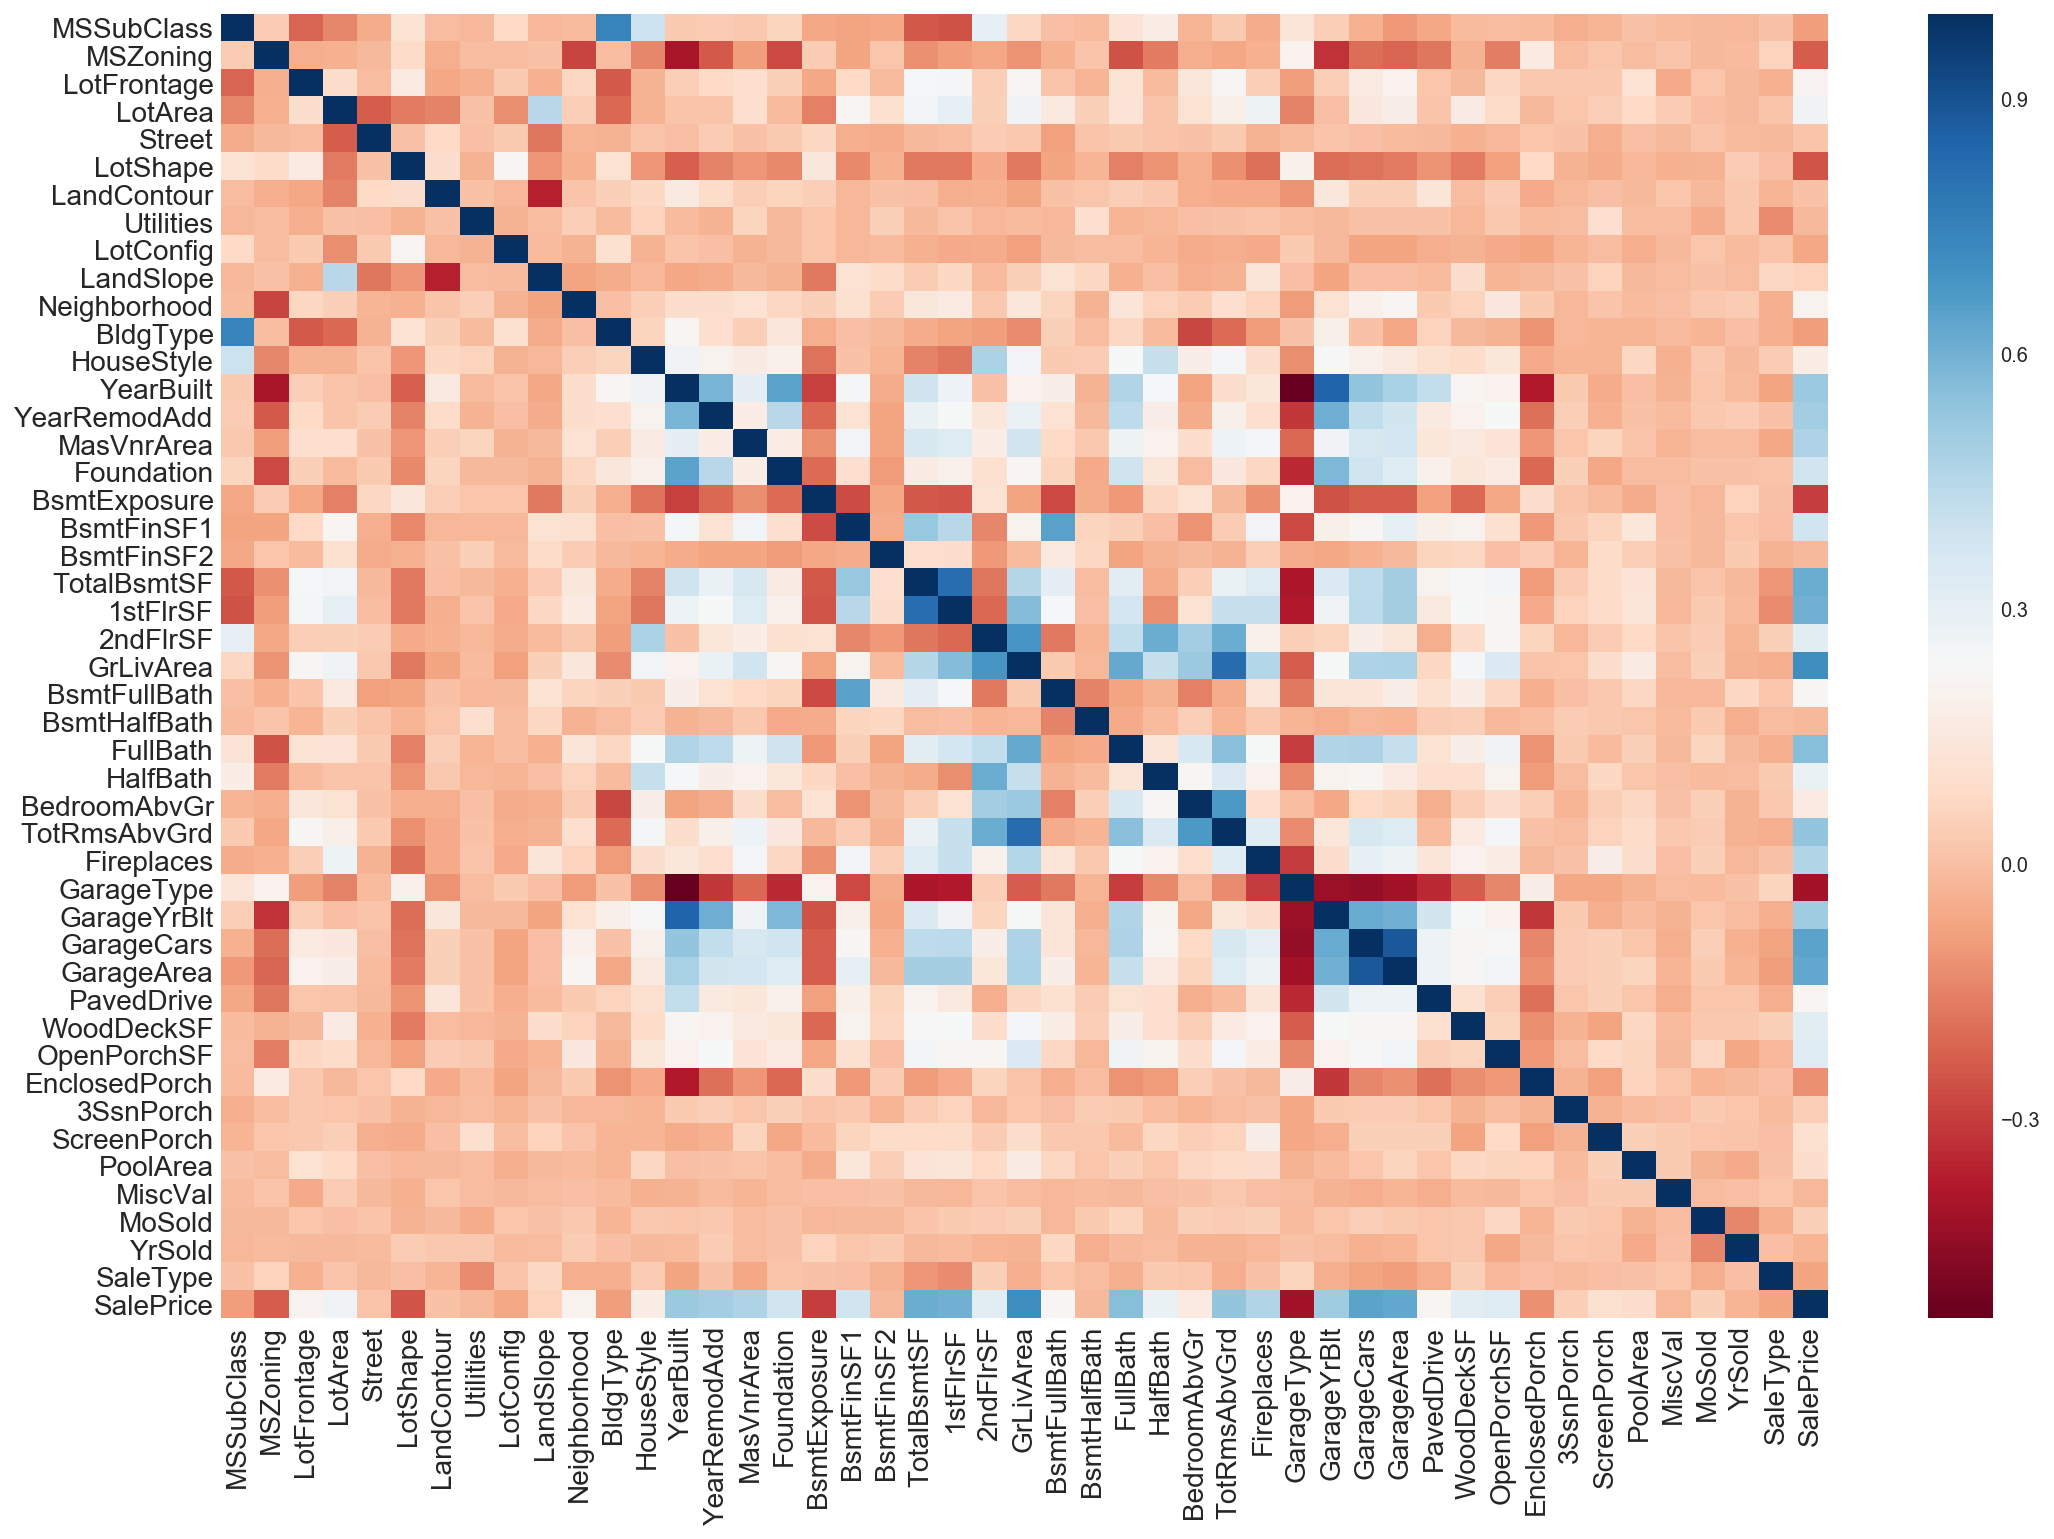

In [24]:

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(18,12))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(fixed_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(fixed_corr, ax=ax, cmap="RdBu" )

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [25]:
# Plotting a linear regression before the train/test split

X = fixed.drop('SalePrice', axis=1)
y = fixed.SalePrice

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, y)

pred_house = pd.DataFrame()
pred_house['Price'] = lin_reg.predict(X)
lin_reg.score(X, y)

0.7847617723143278

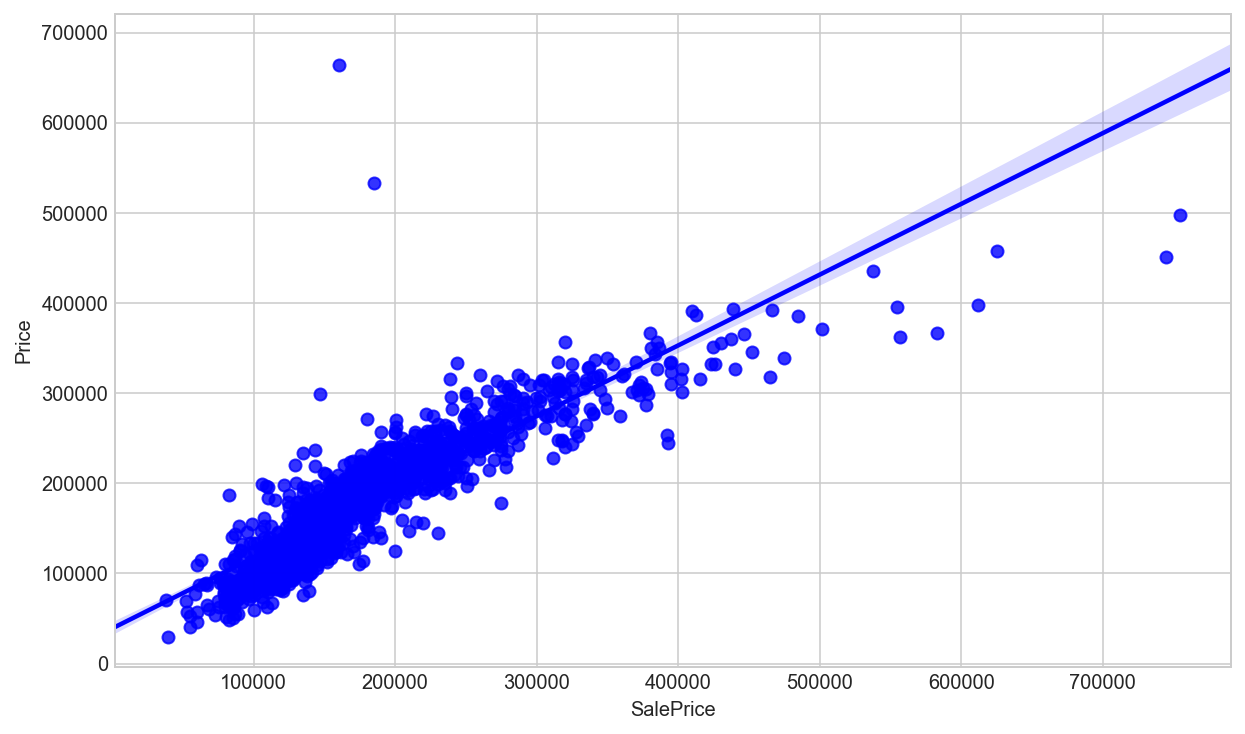

In [26]:
fig, ax_arr = plt.subplots(1,1, figsize=(10,6))

axis0 = sns.regplot(y, pred_house['Price'], color='blue', ax=ax_arr)

In [27]:
# Create the pre-2010 and 2010 splits

house_pre2010 = fixed[fixed.YrSold < 2010]
house_2010 = fixed[fixed.YrSold == 2010]

Xtr_pre2010 = house_pre2010.drop('SalePrice', axis=1)
Xte_2010 = house_2010.drop('SalePrice', axis=1)

In [28]:
# Standizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs_train = scaler.fit_transform(Xtr_pre2010)
Xs_test = scaler.fit_transform(Xte_2010)

In [29]:
# not standadized for testing purpose
X_train = Xtr_pre2010
X_test = Xte_2010

In [30]:
# Get the targets

y_train = house_pre2010.SalePrice
y_test = house_2010.SalePrice

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1278, 46), (172, 46), (1278L,), (172L,))

### Doing Linear Regression Model


Score: 0.8301024505323638
RMSE: 32864.974189114095
[-5628.98803318 -1838.85226637   271.6446608   1775.95831933
  1415.22853816 -1631.74510855  1370.41347337 -1172.13549293
   851.4575143    370.90794622  4723.13413104 -3164.98121143
 -3642.28018101 12292.57886823 10723.86932314  7220.75744262
  1669.54063032 -7621.14375417  1517.60919244 -1175.65999021
 10607.48296712  3065.41521691 11941.45250011 22159.78139449
  4224.77067301   937.52003367  2208.02517049 -1317.33435035
 -9693.01009481  5122.18685399  7032.27163807  2681.41493717
 -2940.68979911 11291.04142459    89.75167782   491.76964405
  3595.93399224   572.58292099   992.33419161  1343.47497151
  3945.1157506  -1370.01054361  -983.30775622   502.01540534
 -1341.75211611  -814.48121147]
181989.78247261344


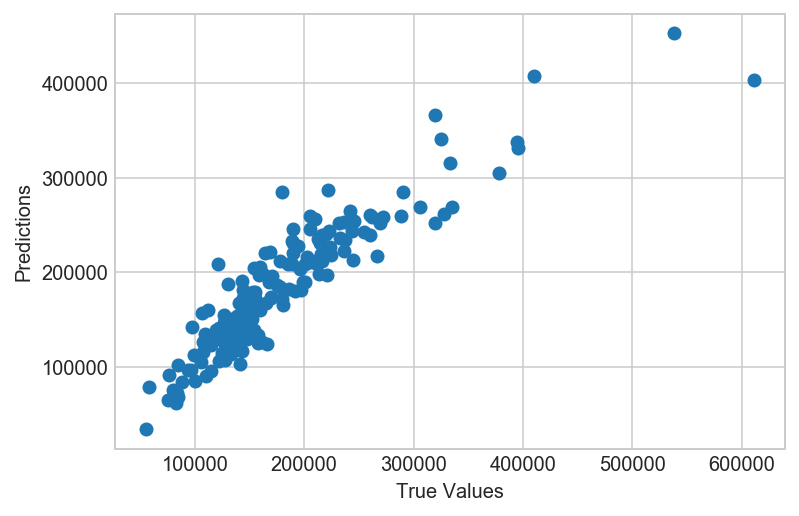

In [32]:
# Linear Regression model
from sklearn import linear_model
lm = linear_model.LinearRegression(normalize=True)

model = lm.fit(Xs_train, y_train)
predictions = lm.predict(Xs_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(Xs_test, y_test)

# calculate RMSE
print "RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions))

# examine the coefficients
print lm.coef_
print lm.intercept_

### Doing Ridge Regression Model

In [33]:
# ridge regression

# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(Xs_train, y_train)
y_pred = ridgereg.predict(Xs_test)
print "Score:", ridgereg.score(Xs_test, y_test)
print "RMSE alpha=0: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))


# try alpha=0.1
ridgereg = Ridge(alpha=10)
ridgereg.fit(Xs_train, y_train)
y_pred = ridgereg.predict(Xs_test)
print "Score:", ridgereg.score(Xs_test, y_test)
print "RMSE alpha=10: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ridgereg.intercept_

Score: 0.8301024505323639
RMSE alpha=0:  32864.97418911409
Score: 0.8304576391178038
RMSE alpha=10:  32830.60238340059
181989.78247261344


In [34]:
# create an array of alpha values# create  
alpha_range = [0.001, 0.1, 1, 10, 25, 50, 100, 200]
alpha_range

[0.001, 0.1, 1, 10, 25, 50, 100, 200]

In [35]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(Xs_train, y_train)
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(Xs_test)

print "Best alpha: ", ridgeregcv.alpha_
print "Best intercept: ", ridgeregcv.intercept_
print "Score:", ridgeregcv.score(Xs_test, y_test)
print "RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Best alpha:  0.1
Best intercept:  181989.78247261344
Score: 0.8303663331058811
RMSE:  32839.44155455709


In [36]:
# examine the coefficients
# print ridgereg.coef_
pd.DataFrame(zip(ridgeregcv.coef_,X.columns))

,0,1
0,-4335.138627,MSSubClass
1,-1696.106842,MSZoning
2,855.877815,LotFrontage
3,1908.143557,LotArea
4,1436.486052,Street
5,-1933.674359,LotShape
6,1060.247002,LandContour
7,-1072.690664,Utilities
8,732.300355,LotConfig
9,469.239730,LandSlope


## Doing Lasso Regression Model

In [37]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(Xs_train, y_train)
y_pred = lassoreg.predict(Xs_test)

print "Score: ",lassoreg.score(Xs_test, y_test)
print "RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score:  0.8301016793480306
RMSE :  32865.0487779605


D:\SeanWong\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [38]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(Xs_train, y_train)
print "Score :", lassoreg.score(Xs_test, y_test)
#pd.DataFrame(zip(lassoreg.coef_,X.columns))
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(Xs_test)
print "RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score : 0.8301015231753333
RMSE : 32865.06388294246


In [39]:
## create an array of alpha values
lalpha_range = [0.001, 0.01, 1, 10, 25, 44, 100, 200]
lalpha_range

[0.001, 0.01, 1, 10, 25, 44, 100, 200]

In [40]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(alphas=lalpha_range)
lassoregcv.fit(Xs_train, y_train)

# predict method uses the best alpha value
y_pred = lassoregcv.predict(Xs_test)

print "Best alpha: ", lassoregcv.alpha_
print "Best intercept: ", lassoregcv.intercept_
print "Score :", lassoregcv.score(Xs_test, y_test)
print "RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Best alpha:  200.0
Best intercept:  181989.78247261344
Score : 0.830456911478019
RMSE:  32830.67283430942


In [41]:
# examine the coefficients
#print lassoregcv.coef_
pd.DataFrame(zip(lassoregcv.coef_,X.columns))

,0,1
0,-5598.183128,MSSubClass
1,-1690.389276,MSZoning
2,159.859209,LotFrontage
3,1617.804061,LotArea
4,1118.324320,Street
5,-1407.991520,LotShape
6,1005.891636,LandContour
7,-924.335802,Utilities
8,554.444321,LotConfig
9,110.829726,LandSlope


## In Conclusion 

#### LassoCV Regression - Score : 0.83045691147, RMSE: 32830.6728343
#### RidgeCV Regression - Score: 0.830366333106, RMSE: 32839.4415546
#### Linear Regression - Score: 0.830102450532, RMSE: 32864.9741891

### Lasso regression model gave me the best score and with the least amount of error

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [62]:
renovate = house[['Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 
                       'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional',  
                       'GarageFinish', 'GarageQual', 'GarageCond','SaleCondition', 'YrSold', 'SalePrice'
                      ]].copy()

In [63]:
null_index = renovate.columns[renovate.isnull().sum()>0]

renovate.isnull().sum()[list(null_index)]

MasVnrType    8
Electrical    1
dtype: int64

In [66]:
#Fill the remaining nulls to zero

renovate.fillna(0, inplace=True)

In [67]:
null_index = renovate.columns[renovate.isnull().sum()>0]

renovate.isnull().sum()[list(null_index)]

Series([], dtype: int64)

In [68]:
str_cols = renovate.columns[renovate.dtypes==object]
str_cols

Index([u'Condition1', u'Condition2', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond', u'BsmtQual',
       u'BsmtCond', u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'SaleCondition'],
      dtype='object')

In [69]:
renovate.shape

(1450, 29)

In [70]:
#Converting categorical to numerical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in str_cols:
    renovate[i] = le.fit_transform(renovate[i])
print renovate.dtypes

Condition1       int64
Condition2       int64
OverallQual      int64
OverallCond      int64
RoofStyle        int64
RoofMatl         int64
Exterior1st      int64
Exterior2nd      int64
MasVnrType       int64
ExterQual        int64
ExterCond        int64
BsmtQual         int64
BsmtCond         int64
BsmtFinType1     int64
BsmtFinType2     int64
BsmtUnfSF        int64
Heating          int64
HeatingQC        int64
CentralAir       int64
Electrical       int64
LowQualFinSF     int64
KitchenQual      int64
Functional       int64
GarageFinish     int64
GarageQual       int64
GarageCond       int64
SaleCondition    int64
YrSold           int64
SalePrice        int64
dtype: object


In [71]:
Xr = renovate.drop(['YrSold', 'SalePrice'], axis=1)
yr = renovate.SalePrice

In [72]:
# Create the pre-2010 and 2010 splits for renovate

renovate_pre2010 = renovate[renovate.YrSold < 2010]
renovate_2010 = renovate[renovate.YrSold == 2010]

Xrtr_pre2010 = renovate_pre2010.drop(['YrSold', 'SalePrice'], axis=1)
Xrte_2010 = renovate_2010.drop(['YrSold', 'SalePrice'], axis=1)

In [73]:
# Standizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xr_train = scaler.fit_transform(Xrtr_pre2010)
Xr_test = scaler.fit_transform(Xrte_2010)

In [74]:
# Get the targets

y_train = renovate_pre2010.SalePrice
y_test = renovate_2010.SalePrice

In [75]:
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(Xr_train, y_train)
print "Score :", lassoreg.score(Xr_test, y_test)

#pd.DataFrame(zip(lassoreg.coef_,X.columns))
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(Xr_test)
print "RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score : 0.7081126807444775
RMSE : 43077.18864292266


Score: 0.7081126807444775
RMSE: 43077.18864292266
Intercept: 181989.78247261347


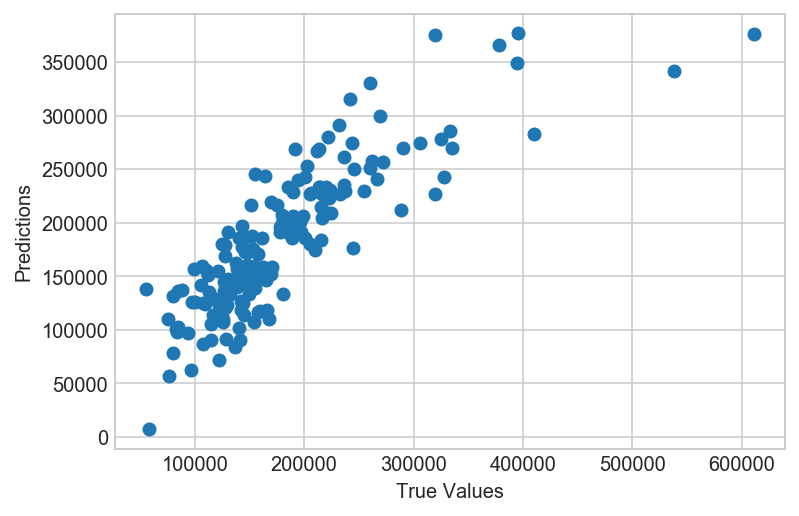

In [77]:
model = lassoreg.fit(Xr_train, y_train)
predictions = lassoreg.predict(Xr_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(Xr_test, y_test)

# calculate RMSE
from sklearn import metrics
import numpy as np
print "RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions))
print "Intercept:", lassoreg.intercept_

In [82]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(alphas=lalpha_range)
lassoregcv.fit(Xr_train, y_train)


y_pred = lassoregcv.predict(Xr_test)
print "Score :", lassoregcv.score(Xr_test, y_test)
print "RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score : 0.7082512276531066
RMSE:  43066.96394436708


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: